In [1]:
## for preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

## for viz

# plt.style.available ## find!
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
#한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
#ticks에 적용될 한글 폰트
font_ticks = fm.FontProperties(fname=font_path, size=10)
#title에 적용될 한글 폰트
font_title = fm.FontProperties(fname=font_path, size=13)

In [2]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

In [3]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [4]:
train.shape, test.shape, sample_submission.shape

((199991, 23), (10009, 21), (10009, 19))

In [5]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 23 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
type_num      199991 non-null int64
dtypes: float64(20),

In [8]:
## 결측치 없음.
train.isnull().sum()

type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
type_num      0
dtype: int64

In [10]:
X_train = train.drop(columns=['type', 'type_num'], axis=1)
Y_train = train['type_num']
X_test = test

In [11]:
merge_data=pd.concat([X_train,X_test],axis=0)
merge_data

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,19.686861,...,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
209996,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,19.763771,...,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
209997,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,20.200872,...,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932



고윳값
[7.80274990e+00 2.78688676e+00 1.36480145e+00 1.30897534e+00
 1.13332479e+00 9.99980104e-01 9.72526700e-01 8.39033103e-01
 7.46700306e-01 6.87383399e-01 5.46662455e-01 4.76221854e-01
 3.60089939e-01 2.95581714e-01 9.80308420e-05 3.59662261e-02
 5.41537448e-02 9.72658486e-02 1.29708416e-01 1.91829135e-01
 1.70160774e-01]


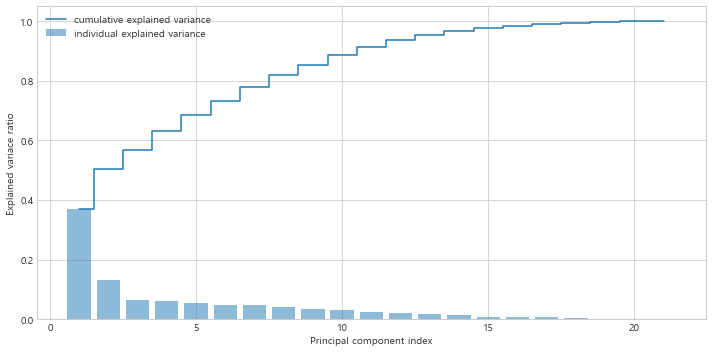

In [12]:
# Converts a class vector (integers) to binary class matrix.
Y_train=Y_train.values
Y_train=to_categorical(Y_train) 

## get eigen(values, vectors) / PCA 축의 설명력 나타내기

# StandardScaler
sc=StandardScaler()
train_X_std=sc.fit_transform(merge_data)

# eigen
cov_mat=np.cov(train_X_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print('\n고윳값\n%s'% eigen_vals)

# plot
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

plt.bar(range(1,22),var_exp,alpha=0.5,align='center',
       label='individual explained variance')
plt.step(range(1,22),cum_var_exp,where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variace ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
X_train=train_X_std[:199991]
X_test=train_X_std[199991:]
# X_train = train_X_std; X_test=test_X_std

In [15]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import initializers,optimizers
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,EarlyStopping
import math
from math import pi
from math import cos
from math import floor
from tensorflow.keras.layers import Activation

In [16]:
def antirectifier(x):
    x -= K.mean(x, axis=1, keepdims=True)
    x = K.l2_normalize(x, axis=1)
    pos = K.relu(x)
    neg = K.relu(-x)
    return K.concatenate([pos, neg], axis=1)

def antirectifier_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 2  # only valid for 2D tensors
    shape[-1] *= 2
    return tuple(shape)

class SnapshotEnsemble(Callback):
    # constructor
    def __init__(self, n_epochs, n_cycles, lrate_max, verbose=0):
        self.epochs = n_epochs
        self.cycles = n_cycles
        self.lr_max = lrate_max
        self.lrates = list()

    # calculate learning rate for epoch
    def cosine_annealing(self, epoch, n_epochs, n_cycles, lrate_max):
        epochs_per_cycle = floor(n_epochs/n_cycles)
        cos_inner = (pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
        return lrate_max/2 * (cos(cos_inner) + 1)

    # calculate and set learning rate at the start of the epoch
    def on_epoch_begin(self, epoch, logs={}):
        # calculate learning rate
        lr = self.cosine_annealing(epoch, self.epochs, self.cycles, self.lr_max)
        # set learning rate
        K.set_value(self.model.optimizer.lr, lr)
        # log value
        self.lrates.append(lr)

    # save models at the end of each cycle
    def on_epoch_end(self, epoch, logs={}):
        # check if we can save model
        epochs_per_cycle = floor(self.epochs / self.cycles)
        if epoch != 0 and (epoch + 1) % epochs_per_cycle == 0:
            # save model to file
            filename = "snapshot_model_%d.h5" % int((epoch + 1) / epochs_per_cycle)
            self.model.save(filename)
            print('\n\n>saved snapshot %s, epoch %d\n\n' % (filename, epoch))

n_epochs = 2000
n_cycles = 10
ca = SnapshotEnsemble(n_epochs, n_cycles, 0.01); callback_lst=[ca]
optimizer=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0, amsgrad=False)

C:\Users\c\miniconda3\envs\jjtensor\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
## 모델링(MLP 모델)
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras
import tensorflow as tf

def mlp_model():
    model = Sequential()
    model.add(Dense(1500,input_dim=21,kernel_initializer='he_uniform'))
    model.add(Lambda(antirectifier,
                 output_shape=antirectifier_output_shape))
    model.add(Dropout(0.3))
    model.add(Dense(1000,kernel_initializer='he_uniform'))
    model.add(Lambda(antirectifier,
                 output_shape=antirectifier_output_shape))
    model.add(Dropout(0.3))
    model.add(Dense(500,kernel_initializer='he_uniform'))
    model.add(Lambda(antirectifier,
                 output_shape=antirectifier_output_shape))
    model.add(Dropout(0.5))
    model.add(Dense(19,kernel_initializer='he_uniform'))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return model


In [19]:
model=mlp_model()
history=model.fit(X_train,Y_train,epochs = n_epochs,
                  shuffle=True,
                  batch_size=512,
                  validation_split = 0.05,
                  callbacks=callback_lst)

In [17]:
# load models from file
from tensorflow.keras.models import load_model

def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'snapshot_model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

def ensemble_predictions(members, testX):
    # make predictions
    probas = np.asarray([model.predict(testX) for model in members])
    avg_proba=np.average(probas,axis=0)
    return avg_proba

In [18]:
# load models in order
members = load_all_models(10)
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))

pred_test=ensemble_predictions(members,X_test)

>loaded snapshot_model_1.h5
>loaded snapshot_model_2.h5
>loaded snapshot_model_3.h5
>loaded snapshot_model_4.h5
>loaded snapshot_model_5.h5
>loaded snapshot_model_6.h5
>loaded snapshot_model_7.h5
>loaded snapshot_model_8.h5
>loaded snapshot_model_9.h5
>loaded snapshot_model_10.h5


In [19]:
##submission
submission = pd.DataFrame(data=pred_test, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission.csv', index=True)

In [20]:
submission

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,4.138872e-11,7.702780e-10,2.821559e-04,2.225232e-01,8.114182e-12,4.255120e-13,7.052502e-08,1.393476e-06,0.000259,2.910223e-23,7.753054e-01,1.450250e-03,1.073401e-20,1.768296e-07,1.904047e-10,1.701913e-20,1.899474e-20,1.768193e-04,1.573228e-06
199992,1.078851e-07,6.318951e-12,2.313001e-22,2.724064e-08,1.283721e-13,6.942590e-18,3.637103e-05,5.340711e-05,0.857212,1.392272e-22,3.274187e-13,3.878235e-02,8.277293e-12,1.038646e-01,9.755527e-08,1.566399e-19,1.167946e-22,3.611504e-05,1.451941e-05
199993,6.065038e-08,5.164516e-13,2.759494e-24,2.921303e-15,3.021919e-09,2.302332e-14,9.956018e-01,6.332356e-12,0.000041,1.273199e-14,6.490951e-16,4.048486e-03,2.609518e-22,3.081284e-04,2.236402e-09,4.120150e-09,3.620487e-18,2.229944e-07,2.163484e-09
199994,2.985021e-08,4.023179e-05,4.068584e-16,4.625429e-08,2.548086e-14,7.295701e-14,3.886495e-08,3.976990e-05,0.106751,1.282400e-23,3.392441e-10,2.098672e-02,7.933438e-08,2.089417e-02,7.008834e-17,9.197490e-22,1.266182e-22,1.352383e-06,8.512865e-01
199995,2.897630e-14,6.620531e-11,1.040058e-10,7.864238e-07,6.691352e-19,2.765020e-19,4.525350e-08,9.356809e-07,0.000072,6.116658e-28,9.988199e-01,1.104493e-03,1.646832e-22,2.123747e-06,5.507180e-12,2.022620e-23,3.449769e-17,4.345992e-08,2.987334e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,1.429317e-02,1.843360e-02,5.253225e-18,4.902908e-09,2.348786e-10,1.253460e-05,1.059511e-07,2.575486e-05,0.113809,5.416624e-24,2.783138e-12,4.290949e-02,5.522977e-08,3.012225e-02,1.492485e-10,3.671515e-17,3.357583e-13,8.182857e-07,7.803932e-01
209996,1.000937e-02,8.051959e-02,2.565026e-17,1.349919e-07,3.158392e-09,4.960548e-05,2.401200e-07,5.465207e-03,0.318742,3.994615e-26,4.323252e-11,4.425712e-02,1.846539e-06,6.312288e-02,9.858603e-11,7.910534e-15,1.611246e-11,7.124456e-06,4.778246e-01
209997,6.979672e-16,3.294999e-20,6.085402e-24,4.918156e-17,2.826266e-15,2.035419e-18,1.366873e-16,4.914927e-18,1.000000,1.923736e-18,1.114821e-20,4.484432e-15,7.880514e-29,2.771630e-14,1.826321e-23,5.483337e-23,1.508739e-30,1.320293e-19,1.218804e-15
